In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import pickle
import joblib
import os
import streamlit as st
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [129]:
data = pd.read_csv("adsclicking.csv")
df = pd.DataFrame(data)

In [130]:
data

,Unnamed: 0,Age,Gender,Income,Location,Device,Interest_Category,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
0,0,56,Male,99003,Rural,Mobile,Sports,81.979324,7,0
1,1,46,Male,72395,Suburban,Tablet,Sports,59.854070,3,1
2,2,32,Male,59758,Suburban,Tablet,Sports,78.861989,2,0
3,3,60,Male,74312,Urban,Tablet,Technology,9.411579,6,0
4,4,25,Female,88670,Suburban,Mobile,Fashion,76.468409,9,0
...,...,...,...,...,...,...,...,...,...,...
1995,1995,42,Female,59876,Urban,Mobile,Technology,33.668965,14,0
1996,1996,37,Female,40323,Rural,Mobile,Technology,30.861980,6,0
1997,1997,19,Female,36428,Urban,Tablet,Travel,64.736610,3,0
1998,1998,56,Female,54578,Urban,Mobile,Travel,69.709207,1,1


In [131]:
# Size      #Row and column     #
df.size , df.shape

(20000, (2000, 10))

In [132]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2000 non-null   int64  
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   Income                  2000 non-null   int64  
 4   Location                2000 non-null   object 
 5   Device                  2000 non-null   object 
 6   Interest_Category       2000 non-null   object 
 7   Time_Spent_on_Site      2000 non-null   float64
 8   Number_of_Pages_Viewed  2000 non-null   int64  
 9   Click                   2000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [133]:
df.describe()

,Unnamed: 0,Age,Income,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.31650,59652.978500,61.113314,10.321500,0.497000
std,577.494589,13.46566,23070.443915,32.518823,5.476507,0.500116
min,0.000000,18.00000,20112.000000,5.006075,1.000000,0.000000
25%,499.750000,30.00000,39873.750000,33.947635,6.000000,0.000000
50%,999.500000,42.00000,59050.500000,60.378894,10.000000,0.000000
75%,1499.250000,53.00000,79547.000000,88.321464,15.000000,1.000000
max,1999.000000,64.00000,99943.000000,119.840992,19.000000,1.000000


In [134]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [135]:
df.head(10)

,Age,Gender,Income,Location,Device,Interest_Category,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
0,56,Male,99003,Rural,Mobile,Sports,81.979324,7,0
1,46,Male,72395,Suburban,Tablet,Sports,59.854070,3,1
2,32,Male,59758,Suburban,Tablet,Sports,78.861989,2,0
3,60,Male,74312,Urban,Tablet,Technology,9.411579,6,0
4,25,Female,88670,Suburban,Mobile,Fashion,76.468409,9,0
5,38,Female,35434,Rural,Tablet,Technology,94.455936,10,1
6,56,Male,84047,Urban,Mobile,Sports,62.541211,4,1
7,36,Male,67775,Rural,Mobile,Travel,46.114033,3,1
8,40,Male,95769,Rural,Tablet,Technology,36.904075,9,1
9,28,Male,86677,Rural,Desktop,Fashion,78.922236,17,1


In [136]:
cat_num =  df.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_col = df.select_dtypes(include=["object"]).columns.tolist()
cat_num

['Age', 'Income', 'Time_Spent_on_Site', 'Number_of_Pages_Viewed', 'Click']

In [137]:
cat_col

['Gender', 'Location', 'Device', 'Interest_Category']

In [138]:
df['Interest_Category'].value_counts()

Interest_Category
Technology    556
Sports        495
Travel        481
Fashion       468
Name: count, dtype: int64

In [139]:
label_gender =LabelEncoder()
df['Gender'] = label_gender.fit_transform(df['Gender'])



In [140]:
label_location = LabelEncoder()
df['Location'] = label_location.fit_transform(df['Location'])

In [141]:
label_device = LabelEncoder()
df['Device'] = label_device.fit_transform(df['Device'])

In [142]:

label_time = LabelEncoder()
df['Time_Spent_on_Site'] = label_time.fit_transform(df['Time_Spent_on_Site'])#


In [143]:
label_interest = LabelEncoder()
df['Interest_Category'] = label_interest.fit_transform(df['Interest_Category'])# 

In [144]:
df

,Age,Gender,Income,Location,Device,Interest_Category,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
0,56,1,99003,0,1,1,1383,7,0
1,46,1,72395,1,2,1,994,3,1
2,32,1,59758,1,2,1,1327,2,0
3,60,1,74312,2,2,2,80,6,0
4,25,0,88670,1,1,0,1295,9,0
...,...,...,...,...,...,...,...,...,...
1995,42,0,59876,2,1,2,496,14,0
1996,37,0,40323,0,1,2,451,6,0
1997,19,0,36428,2,2,3,1091,3,0
1998,56,0,54578,2,1,3,1177,1,1


In [145]:
x = df.drop('Click',axis=1)
y = df['Click']

In [146]:
x.shape

(2000, 8)

In [147]:
y.shape

(2000,)

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1000)

In [149]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [150]:
x_train.shape

(1600, 8)

In [151]:
y_train.shape

(1600,)

In [152]:
x_test.shape

(400, 8)

In [153]:
y_test.shape

(400,)

In [154]:
pipiline_for_model_with_std_data = Pipeline([
    ("scalig",StandardScaler()),
    ("model",LinearRegression())
])


In [155]:
mode_std=pipiline_for_model_with_std_data.fit(x_test,y_test)
mode_std

,steps,"[('scalig', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [156]:
pipiline_for_model_with_minMax_data = Pipeline([
    ("scalig",MinMaxScaler()),
    ("model",LinearRegression())
])
mode_minMax=pipiline_for_model_with_minMax_data.fit(x_train,y_train)
mode_minMax

,steps,"[('scalig', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [157]:
min_max = mode_minMax.predict(x_test)
min_max

array([0.48725058, 0.53956578, 0.53789635, 0.48788664, 0.49461462,
       0.53977514, 0.48122688, 0.54267655, 0.54299229, 0.53509939,
       0.51531991, 0.53919491, 0.50126775, 0.50430868, 0.53072261,
       0.5141737 , 0.47028768, 0.52154236, 0.50662023, 0.50826891,
       0.49049596, 0.50233567, 0.51759958, 0.50068987, 0.48238793,
       0.48144634, 0.51006884, 0.49232869, 0.48376392, 0.51911969,
       0.51243102, 0.48505583, 0.45580725, 0.46937411, 0.49919694,
       0.51496371, 0.50883166, 0.49202046, 0.49504678, 0.4953968 ,
       0.49212363, 0.4674183 , 0.49895189, 0.54993917, 0.50866759,
       0.5123177 , 0.48552598, 0.5179951 , 0.50540877, 0.51025013,
       0.52198584, 0.53211051, 0.48361083, 0.49115515, 0.54129431,
       0.50692198, 0.52172496, 0.45683659, 0.46043386, 0.49983594,
       0.51806592, 0.51338509, 0.49788848, 0.52471108, 0.54190221,
       0.48462247, 0.55030338, 0.47531949, 0.48142574, 0.49840354,
       0.50320286, 0.52591943, 0.50098908, 0.53204486, 0.49443

In [158]:
std_prd = mode_std.predict(x_test)
std_prd

array([0.40824781, 0.48356612, 0.47633757, 0.49654239, 0.43586633,
       0.51420601, 0.39287753, 0.45760323, 0.42097915, 0.47184116,
       0.35727364, 0.42259737, 0.42930955, 0.4959403 , 0.47267678,
       0.47229632, 0.53431568, 0.50498307, 0.44293187, 0.441933  ,
       0.41640797, 0.38634737, 0.46314863, 0.46099435, 0.4872935 ,
       0.47419648, 0.46855546, 0.50102401, 0.37215956, 0.4410739 ,
       0.44619357, 0.45456019, 0.46481489, 0.51340979, 0.45670214,
       0.45094576, 0.46682351, 0.52000689, 0.50777463, 0.45903983,
       0.43548283, 0.42021157, 0.41724865, 0.43400057, 0.52294719,
       0.46051785, 0.48528159, 0.54321259, 0.42305363, 0.48607781,
       0.46449921, 0.48069273, 0.45963027, 0.3689451 , 0.39919417,
       0.36414295, 0.5529179 , 0.46582933, 0.47097224, 0.43576173,
       0.36457566, 0.48655593, 0.42898404, 0.52769626, 0.36506758,
       0.41119087, 0.48558143, 0.43188456, 0.50491072, 0.49798193,
       0.364963  , 0.46842221, 0.41137222, 0.44086577, 0.52483

In [159]:
y_test

82      1
1935    0
1639    0
1591    0
1433    1
       ..
1253    0
1805    0
1269    1
1495    1
1324    1
Name: Click, Length: 400, dtype: int64

In [160]:
nse = mean_squared_error(y_test,std_prd)
nse   # error wrong prediction

0.24548932351424363

In [161]:
rmse = np.sqrt(nse)
rmse


np.float64(0.4954687916652709)

In [162]:
ridge = Ridge(alpha=1000)
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

-0.013957841136448934

In [163]:
ridge.score(x_test,y_test)#l2 ridge regression

-0.013957841136448934

In [164]:
laso=Lasso()
laso.fit(x_train,y_train)
laso.score(x_test,y_test)

-0.013653413205832576

In [165]:
svr = SVR()
svr.fit(x_train,y_train)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [166]:
svr.score(x_test,y_test)

-0.4259709948514403

In [167]:
svr_std=Pipeline([
    ("scaling",StandardScaler()),
    ("mode",SVR(kernel="poly"))
])
svr_std

,steps,"[('scaling', ...), ('mode', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0


In [168]:
svr_std_model=svr_std.fit(x_train,y_train)

In [169]:
svr_std_model.score(x_test,y_test)

-0.2507596460217445

In [170]:
dy=DecisionTreeRegressor()
dy.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [171]:
dy.score(x_test,y_test)

-1.08080808080808

In [172]:
y_pred=dy.predict(x_test)
y_pred

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0.

In [173]:
nse=mean_squared_error(y_pred,y_test)
nse

0.515

In [174]:
rmse =np.sqrt(nse)
rmse

np.float64(0.7176350047203662)

In [175]:
r2=r2_score(y_pred,y_test)
r2

-1.063301282051282

In [176]:
os.makedirs("model", exist_ok=True)

In [177]:
dy.predict(x_test)

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0.

In [178]:
Gender = st.selectbox("Gender", ["Male", "Female"])
Interest_Category = st.selectbox("Interest_Category", df['Interest_Category'].unique())
Device = st.selectbox("Device", df['Device'].unique())
Location = st.selectbox("Location", df['Location'].unique())


2025-09-24 15:38:14.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.819 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [179]:
uploaded_file = st.file_uploader("Upload CSV", type=["csv"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write(df)

2025-09-24 15:38:14.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 15:38:14.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [180]:
with open("model/label_gender.pkl", "wb") as f:
    pickle.dump(label_gender, f)

In [181]:
with open("model/label_location.pkl", "wb") as f:
    pickle.dump(label_location, f)

In [182]:
with open("model/label_interest.pkl", "wb") as f:
    pickle.dump(label_interest, f)

In [183]:
with open("model/label_time.pkl", "wb") as f:
    pickle.dump(label_time, f)

In [184]:
with open("model/label_device.pkl", "wb") as f:
    pickle.dump(label_device, f)

In [185]:
with open("model/label_dy.pkl", "wb") as f:
    pickle.dump(dy,f)

In [186]:
with open("model/final_model.pkl", "wb") as f:
    pickle.dump(model, f)


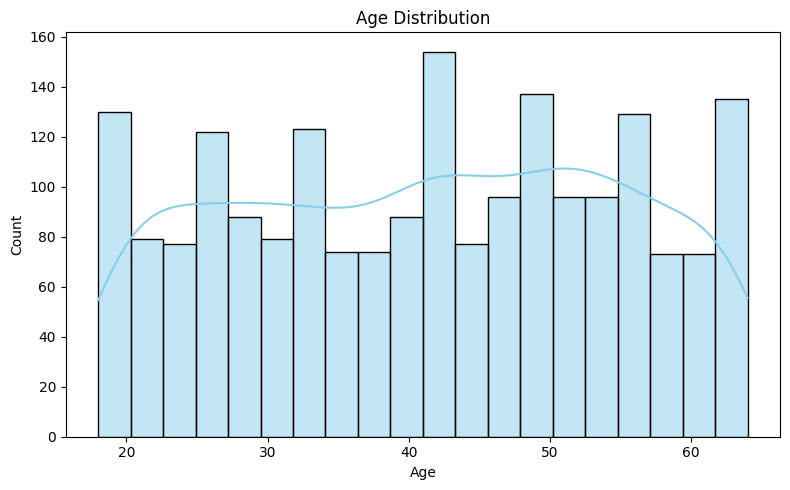

In [187]:
# ----- Age Distribution -----
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age'); plt.ylabel('Count')
plt.tight_layout()
plt.savefig("age_distribution.png")

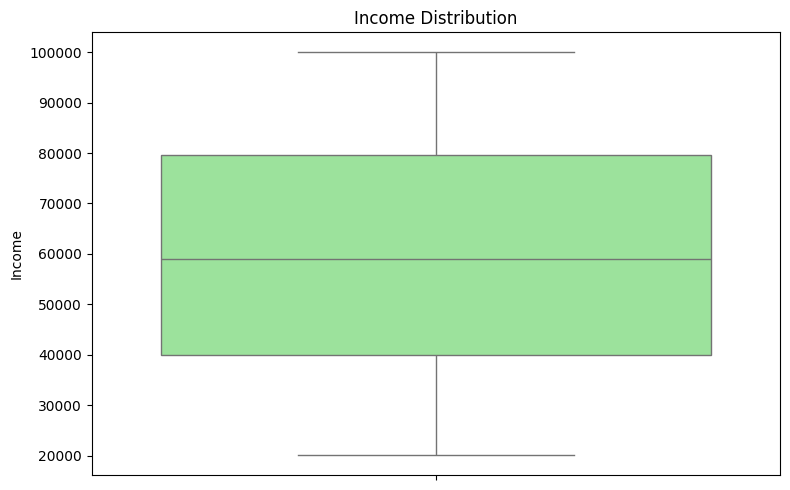

In [188]:
# ----- Income Distribution -----
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Income'], color='lightgreen')
plt.title('Income Distribution')
plt.ylabel('Income')
plt.tight_layout()
plt.savefig("income_boxplot.png")


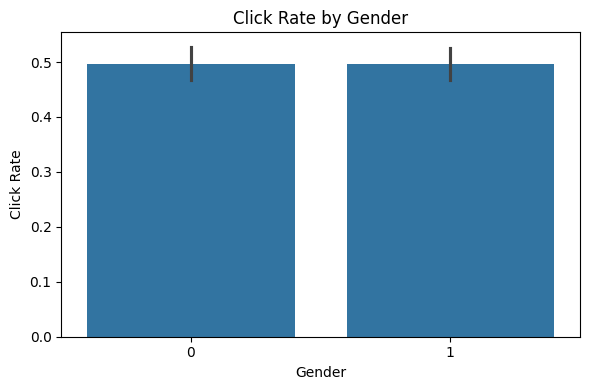

In [189]:
# ----- Gender vs Click -----
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Click', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Click Rate by Gender')
plt.ylabel('Click Rate')
plt.tight_layout()
plt.savefig("gender_click_rate.png")

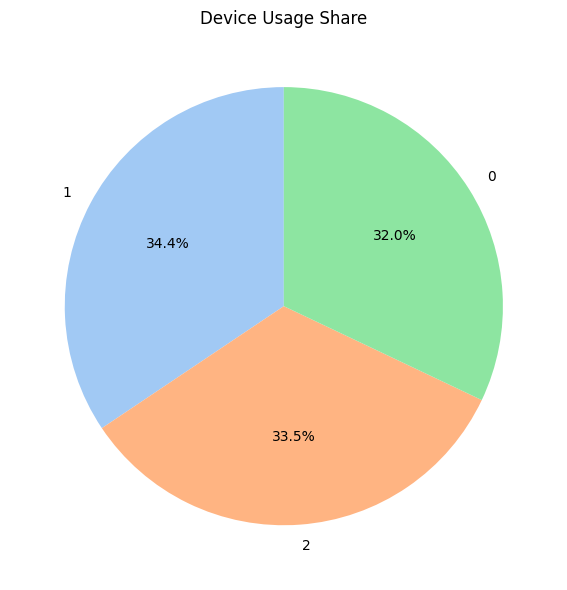

In [190]:
# ----- Device Usage -----
plt.figure(figsize=(6,6))
df['Device'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Device Usage Share')
plt.ylabel('')
plt.tight_layout()
plt.savefig("device_usage.png")

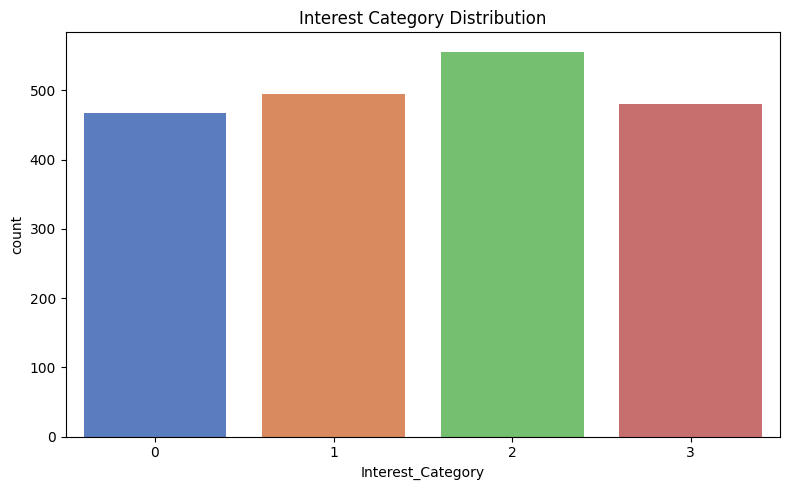

In [191]:
# ----- Interest Category Popularity -----
plt.figure(figsize=(8,5))
sns.countplot(x='Interest_Category', data=df, palette='muted')
plt.title('Interest Category Distribution')
plt.tight_layout()
plt.savefig("interest_category.png")


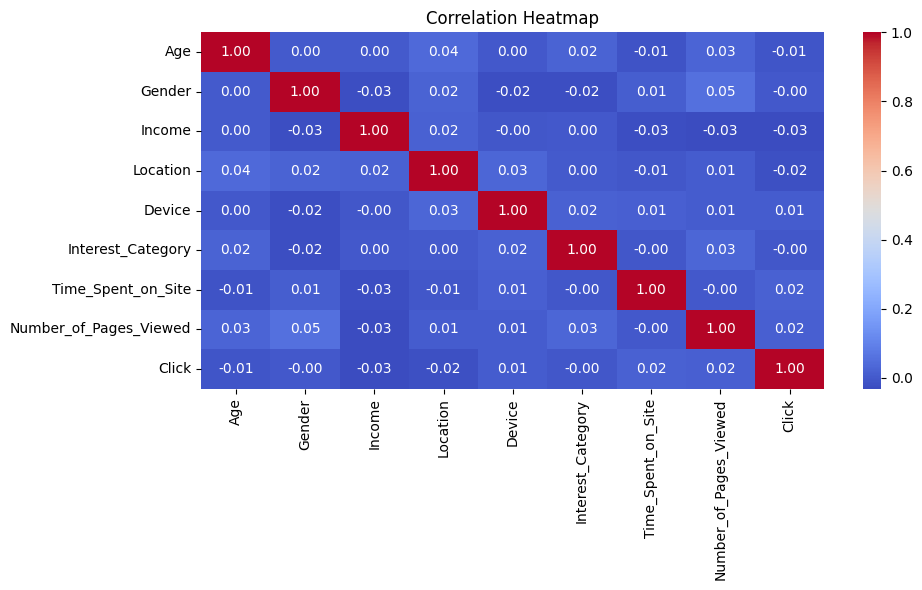

In [192]:
# ----- Correlation Heatmap -----
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")

✅ All visualizations saved as PNG files.


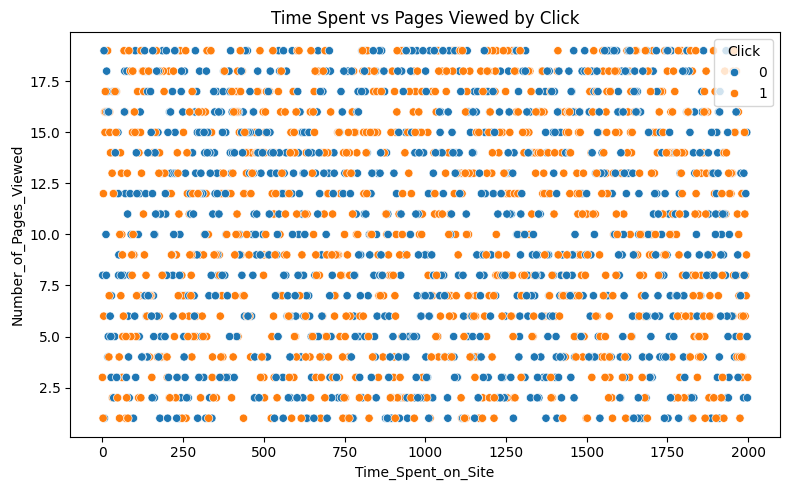

In [193]:
# Scatter plot: Time spent vs Pages viewed, hue=Click
plt.figure(figsize=(8,5))
sns.scatterplot(x='Time_Spent_on_Site', y='Number_of_Pages_Viewed', hue='Click', data=df)
plt.title('Time Spent vs Pages Viewed by Click')
plt.tight_layout()
plt.savefig("scatter_time_pages.png")

print("✅ All visualizations saved as PNG files.")

In [195]:
# appendix_report.py
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet
import glob

# ----- Settings -----
output_file = "Ad_Click_Appendix_Report.pdf"
image_folder = "."  # जहां PNG इमेज सेव हैं
styles = getSampleStyleSheet()

# ----- Create Document -----
doc = SimpleDocTemplate(output_file, pagesize=A4)
elements = []

# Title Page
elements.append(Paragraph("<b>Appendix: Data Visualizations</b>", styles["Title"]))
elements.append(Spacer(1, 24))
elements.append(Paragraph(
    "This appendix contains all saved visualizations generated from the Ad Click Prediction dataset. "
    "Each figure corresponds to insights explained in the main report.",
    styles["BodyText"]
))
elements.append(PageBreak())

# Add all PNG files found in folder
png_files = sorted(glob.glob(f"{image_folder}/*.png"))
for i, file in enumerate(png_files, start=1):
    elements.append(Paragraph(f"Figure {i}", styles["Heading2"]))
    elements.append(Image(file, width=400, height=250))
    elements.append(Spacer(1, 20))

doc.build(elements)
print(f"✅ PDF '{output_file}' created successfully with {len(png_files)} figures.")


✅ PDF 'Ad_Click_Appendix_Report.pdf' created successfully with 7 figures.
